<a href="https://colab.research.google.com/github/luciansantana/covid19/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

#COVID

In [267]:
covid = pd.read_excel("https://github.com/luciansantana/covid19/blob/master/HIST_PAINEL_COVIDBR_22jun2020.xlsx?raw=true")

##Médias móveis por região

In [ ]:
teste = covid.dropna(subset = ['estado'])
teste = teste[teste['regiao']=='Nordeste']
cod = sorted(teste['estado'].unique())
plt.figure(figsize = (22,8))
for i in cod:
  estado = covid[covid['estado']==i]
  estado = estado[estado['municipio'].isnull()]
  estado = estado.dropna(subset = ['populacaoTCU2019'])
  estado = estado.set_index(['data'])
  x = estado['casosNovos']
  mean_rolling = x.rolling(window=7).mean()
  plt.plot(mean_rolling,label = i)
  plt.ylabel('Número de obitos')
  plt.xlabel('Data')
  plt.legend()

## Médias móveis por cidade

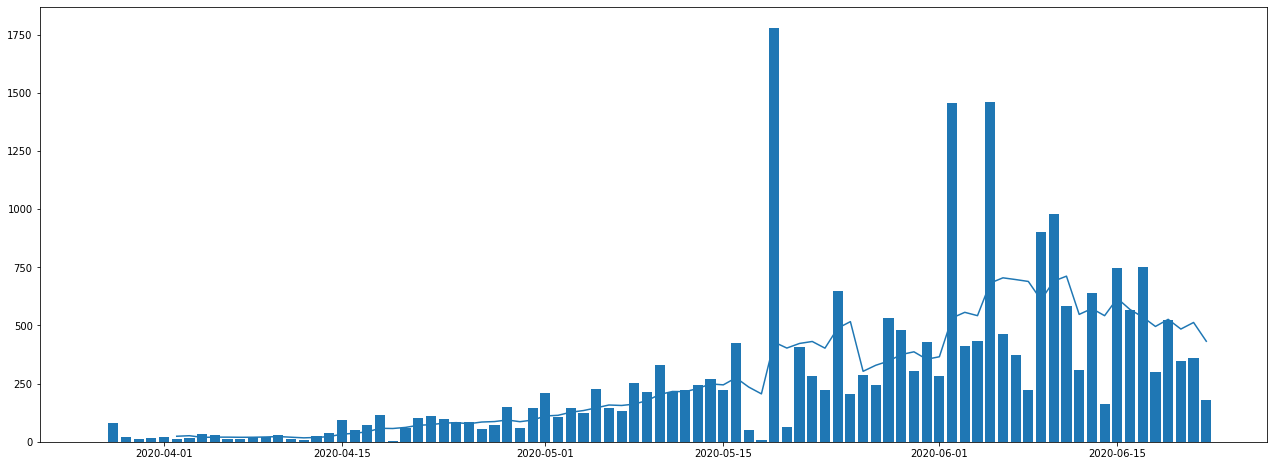

In [369]:
salvador = covid[covid['municipio']=='Salvador']
salvador = salvador.set_index('data')
variavel = salvador['casosNovos']
variavel = (variavel**2)**(1/2)
mean_salvador_rolling = variavel.rolling(window = 7).mean()
plt.figure(figsize=(22,8))
plt.bar(variavel.index,variavel)
plt.plot(mean_salvador_rolling)

Series([], Name: casosNovos, dtype: float64)


In [364]:
variavel

data
2020-03-27     0
2020-03-28     0
2020-03-29     1
2020-03-30     0
2020-03-31     1
              ..
2020-06-18    27
2020-06-19    27
2020-06-20    30
2020-06-21    20
2020-06-22    15
Name: obitosNovos, Length: 88, dtype: int64

## Médias móveis Brasil

Text(0.5, 0, 'Data')

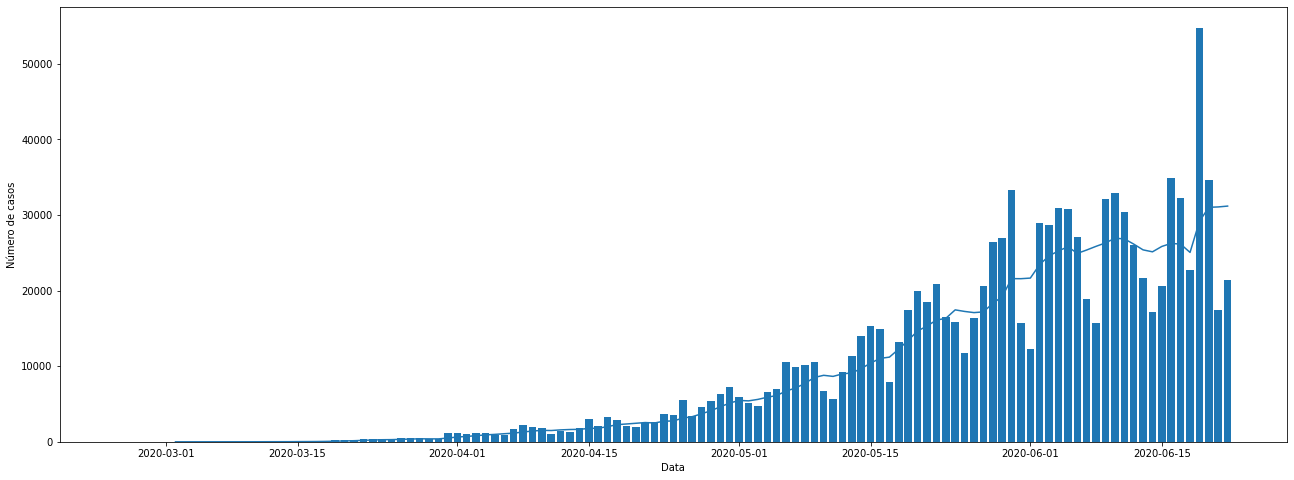

In [370]:
brazil_covid = covid[covid['regiao']=='Brasil']
brazil_covid = brazil_covid.set_index('data')
variavel = brazil_covid['casosNovos']
data = variavel.index
mean_brazil_rolling = variavel.rolling(window=7).mean()
plt.figure(figsize=(22,8))
plt.bar(data,variavel)
plt.plot(mean_brazil_rolling)
plt.ylabel('Número de casos')
plt.xlabel('Data')